# <img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Analysis Notebook</b> <br>
Contact author: Eric Bellm<br>
Last verified to run: Feb. 14, 2024<br>
LSST Science Piplines version: w_2024_06<br>
Container Size: Large <br>

# Determine date ranges in HSC COSMOS and HITS


## 1. <a id="section_1">Imports, Helper Functions, and Loading</a>

In [10]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import lsst.daf.butler as dafButler
from lsst.analysis.ap import legacyPlotUtils as plac
from lsst.analysis.ap import apdb

from lsst.ap.association import UnpackApdbFlags, TransformDiaSourceCatalogConfig
import functools
import operator
from IPython.display import Image, display

import lsst.afw.display as afwDisplay
import astropy.units as u
from astropy.time import Time

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.set_loglevel('WARNING')

### Loading Data: COSMOS

In [2]:
repo = '/repo/main'
butler = dafButler.Butler(repo)
instrument = 'HSC'
skymap = 'hsc_rings_v1'

collections = f'u/elhoward/DM-41896/HSC-precon-rb'
schema = f'elhoward_dm41896_hsc_appipewithfakes_precon_rb'

apdbQuery = apdb.ApdbPostgresQuery(butler=butler, instrument=instrument, namespace=schema)

In [4]:
with apdbQuery.connection as connection:
    df = pd.read_sql_query('SELECT * \
                                 FROM "{}"."DiaSource" LIMIT 1;'.format(schema), connection)

In [5]:
df.columns

Index(['diaSourceId', 'ccdVisitId', 'diaObjectId', 'ssObjectId',
       'parentDiaSourceId', 'ssObjectReassocTime', 'midpointMjdTai', 'ra',
       'raErr', 'dec',
       ...
       'ixyPSF', 'extendedness', 'reliability', 'flags', 'band', 'isDipole',
       'time_processed', 'time_withdrawn', 'bboxSize', 'pixelId'],
      dtype='object', length=112)

In [8]:
with apdbQuery.connection as connection:
    df = pd.read_sql_query('SELECT min("midpointMjdTai") as min_mjd, max("midpointMjdTai") as max_mjd \
                                 FROM "{}"."DiaSource";'.format(schema), connection)

In [9]:
df

,min_mjd,max_mjd
0,56741.400239,57163.296292


In [11]:
Time(df['min_mjd'],format='mjd').iso

array(['2014-03-25 09:36:20.614'], dtype='<U23')

In [12]:
Time(df['max_mjd'],format='mjd').iso

array(['2015-05-21 07:06:39.671'], dtype='<U23')

### Loading Data: HiTS

In [13]:
repo = '/repo/main'
butler = dafButler.Butler(repo)
instrument = 'DECam'
skymap = 'decam_rings_v1'

collections = f'u/elhoward/DM-38243/HiTS'
schema = f'elhoward_dm38243_hits_appipe'

apdbQuery = apdb.ApdbPostgresQuery(butler=butler, instrument=instrument, namespace=schema)

In [14]:
with apdbQuery.connection as connection:
    df = pd.read_sql_query('SELECT * \
                                 FROM "{}"."DiaSource" LIMIT 1;'.format(schema), connection)

In [15]:
df.columns

Index(['diaSourceId', 'ccdVisitId', 'diaObjectId', 'ssObjectId',
       'parentDiaSourceId', 'prv_procOrder', 'ssObjectReassocTime',
       'midPointTai', 'ra', 'raErr',
       ...
       'ixxPSF', 'iyyPSF', 'ixyPSF', 'extendedness', 'spuriousness', 'flags',
       'filterName', 'isDipole', 'bboxSize', 'pixelId'],
      dtype='object', length=111)

In [18]:
with apdbQuery.connection as connection:
    df = pd.read_sql_query('SELECT min("midPointTai") as min_mjd, max("midPointTai") as max_mjd \
                                 FROM "{}"."DiaSource";'.format(schema), connection)

In [19]:
df

,min_mjd,max_mjd
0,57070.141866,57095.193229


In [20]:
Time(df['min_mjd'],format='mjd').iso

array(['2015-02-17 03:24:17.200'], dtype='<U23')

In [21]:
Time(df['max_mjd'],format='mjd').iso

array(['2015-03-14 04:38:15.021'], dtype='<U23')

Text(0.5, 1.0, 'DIA Object and DIA Source counts (with fakes)')

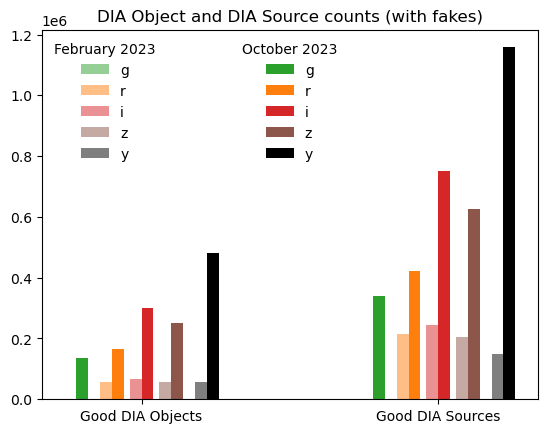

In [19]:
label1 = f'{month_old} {year_old}'
label2 = f'{month} {year}'

fig, ax = plt.subplots()
barLabels = ['Good DIA Objects', 'Good DIA Sources']
xbar = np.array([0, 1])
width = 0.2

# Previous Run
goodObjG_old = goodObj_old.loc[goodObj_old['gPSFluxMean'] > 0]
goodObjR_old = goodObj_old.loc[goodObj_old['rPSFluxMean'] > 0]
goodObjI_old = goodObj_old.loc[goodObj_old['iPSFluxMean'] > 0]
goodObjZ_old = goodObj_old.loc[goodObj_old['zPSFluxMean'] > 0]
goodObjY_old = goodObj_old.loc[goodObj_old['yPSFluxMean'] > 0]

goodSrcG_old = goodSrc_old.loc[goodSrc_old['filterName'] == 'g']
goodSrcR_old = goodSrc_old.loc[goodSrc_old['filterName'] == 'r']
goodSrcI_old = goodSrc_old.loc[goodSrc_old['filterName'] == 'i']
goodSrcZ_old = goodSrc_old.loc[goodSrc_old['filterName'] == 'z']
goodSrcY_old = goodSrc_old.loc[goodSrc_old['filterName'] == 'y']

g_old = ax.bar(xbar - (6/5) * width, [len(goodObjG_old), len(goodSrcG_old)], width/5, label='g', color='C2', alpha=0.5)
r_old = ax.bar(xbar - (3/5) * width, [len(goodObjR_old), len(goodSrcR_old)], width/5, label='r', color='C1', alpha=0.5)
i_old = ax.bar(xbar - (1/10) * width, [len(goodObjI_old), len(goodSrcI_old)], width/5, label='i', color='C3', alpha=0.5)
z_old = ax.bar(xbar + (2/5) * width, [len(goodObjZ_old), len(goodSrcZ_old)], width/5, label='z', color='C5', alpha=0.5)
y_old = ax.bar(xbar + width, [len(goodObjY_old), len(goodSrcY_old)], width/5, label='y', color='k', alpha=0.5)

# Current 
goodObjG = goodObj.loc[goodObj['gPSFluxMean'] > 0]
goodObjR = goodObj.loc[goodObj['rPSFluxMean'] > 0]
goodObjI = goodObj.loc[goodObj['iPSFluxMean'] > 0]
goodObjZ = goodObj.loc[goodObj['zPSFluxMean'] > 0]
goodObjY = goodObj.loc[goodObj['yPSFluxMean'] > 0]

goodSrcG = goodSrc.loc[goodSrc['filterName'] == 'g']
goodSrcR = goodSrc.loc[goodSrc['filterName'] == 'r']
goodSrcI = goodSrc.loc[goodSrc['filterName'] == 'i']
goodSrcZ = goodSrc.loc[goodSrc['filterName'] == 'z']
goodSrcY = goodSrc.loc[goodSrc['filterName'] == 'y']

g = ax.bar(xbar - width, [len(goodObjG), len(goodSrcG)], width/5, label='g', color='C2')
r = ax.bar(xbar - (2/5) * width, [len(goodObjR), len(goodSrcR)], width/5, label='r', color='C1')
i = ax.bar(xbar + (1/10) * width, [len(goodObjI), len(goodSrcI)], width/5, label='i', color='C3')
z = ax.bar(xbar + (3/5) * width, [len(goodObjZ), len(goodSrcZ)], width/5, label='z', color='C5')
y = ax.bar(xbar + (6/5) * width, [len(goodObjY), len(goodSrcY)], width/5, label='y', color='k')

ax.set_xticks([0, 1])
labels = ax.set_xticklabels(barLabels)
previous_legend = plt.legend(handles=[g_old, r_old, i_old, z_old,  y_old], loc='upper left', frameon=False, title=label1)
ax = plt.gca().add_artist(previous_legend)
current_legend = plt.legend(handles=[g, r, i, z,  y], loc='upper center', frameon=False, title=label2)
plt.title(f'DIA Object and DIA Source counts ({fakeStatus})')

Text(0.5, 1.0, 'Comparing DIA Object and Source counts (with fakes)')

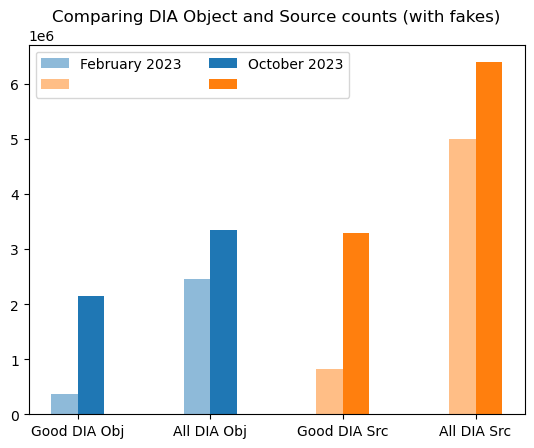

In [20]:
label1 = f'{month_old} {year_old}'
label2 = f'{month} {year}'

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.2

# Previous Run
ax.bar(xbar - width/2, [len(goodObj_old), len(objTable_old)], 
       width, label=label1, color='C0', alpha=0.5)
ax.bar(xbar + 2 - width/2, [len(goodSrc_old), len(srcTable_old)],
       width, label=' ', color='C1', alpha=0.5)

# Current Run
ax.bar(xbar + width/2, [len(goodObj), len(objTable)], 
       width, label=label2, color='C0')
ax.bar(xbar + 2 + width/2, [len(goodSrc), len(srcTable)],
       width, label=' ', color='C1')

plt.legend(ncol=2)
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title(f'Comparing DIA Object and Source counts ({fakeStatus})')

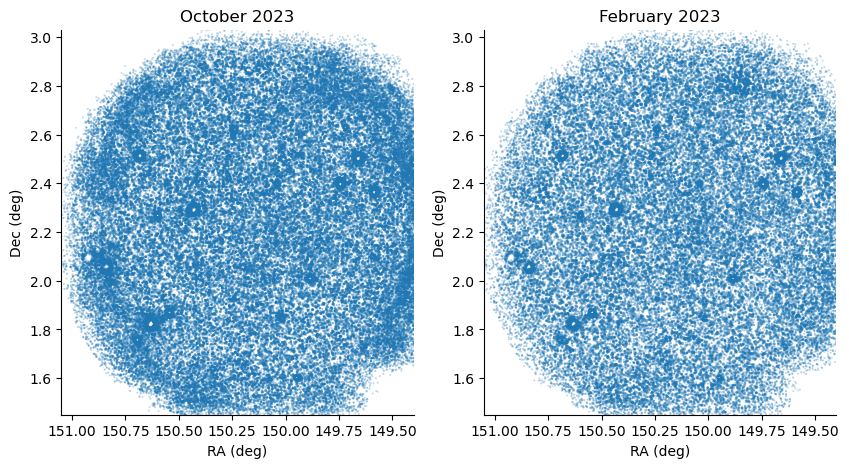

In [21]:
cutoff = 3
compareAll(goodObj, goodObj_old, cutoff = cutoff,
           title = f'DIA Objects composed of > {cutoff} "Good" DIA Sources ({fakeStatus})')

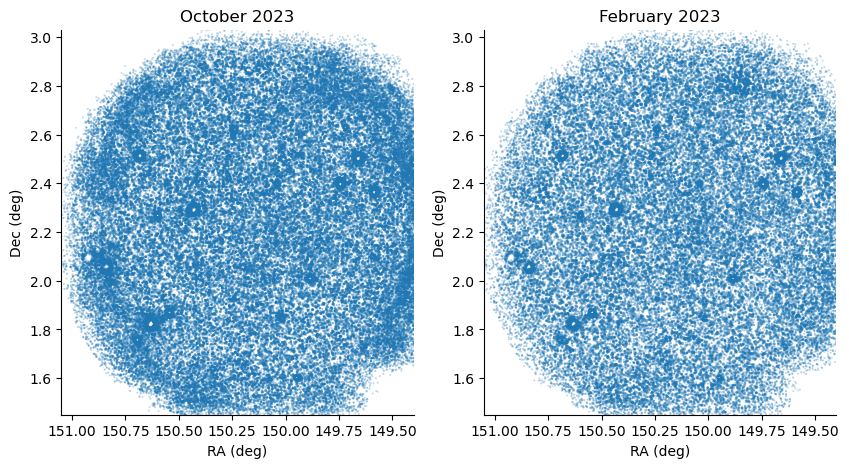

In [22]:
cutoff = 3
compareAll(goodObj, goodObj_old, cutoff = cutoff,
           title = f'DIA Objects composed of > {cutoff} "Good" DIA Sources ({fakeStatus})')

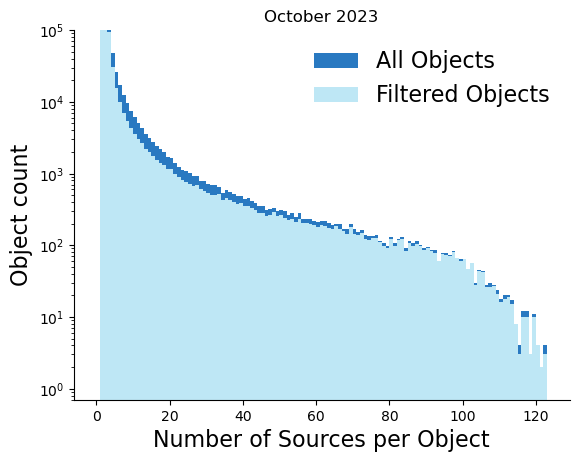

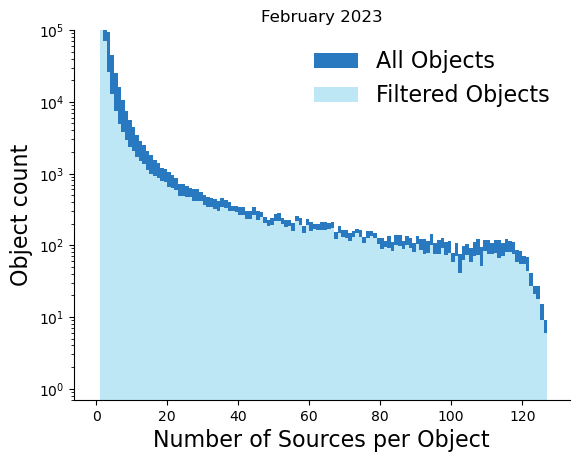

In [23]:
plac.plotDiaObjectHistogram(objTable, goodObj, title=f'{month} {year}');
plac.plotDiaObjectHistogram(objTable_old, goodObj_old, title=f'{month_old} {year_old}');

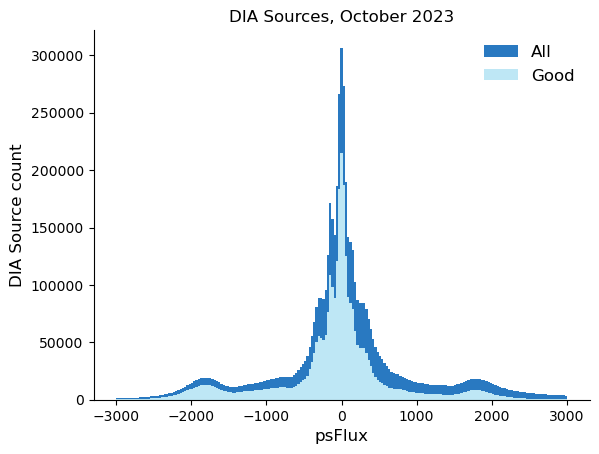

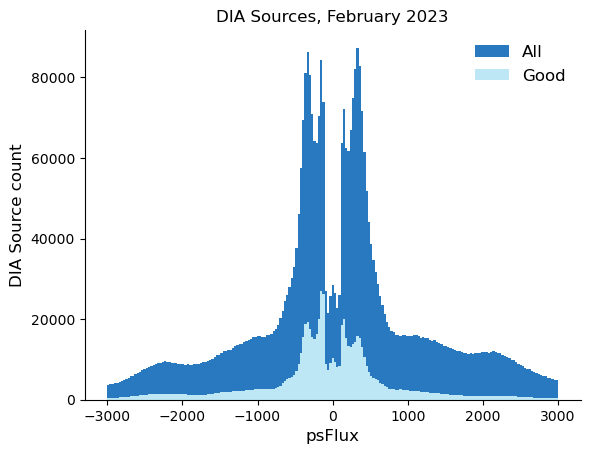

In [24]:
plac.plotFluxHistSrc(srcTable, goodSrc, fluxType='psFlux', label1='All', label2='Good',
                title=f'DIA Sources, {month} {year}')
plac.plotFluxHistSrc(srcTable_old, goodSrc_old, fluxType='psFlux', label1='All', label2='Good',
                title=f'DIA Sources, {month_old} {year_old}')

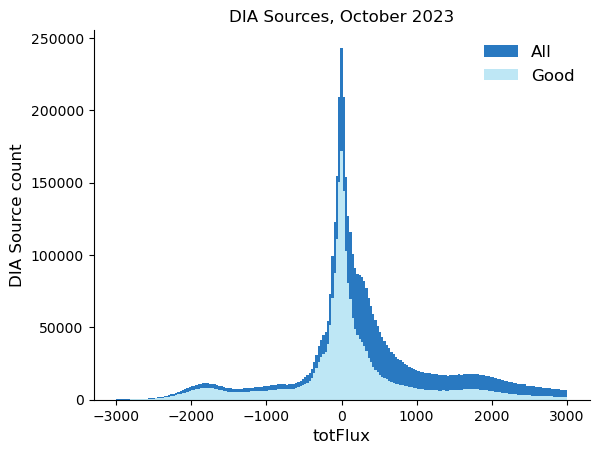

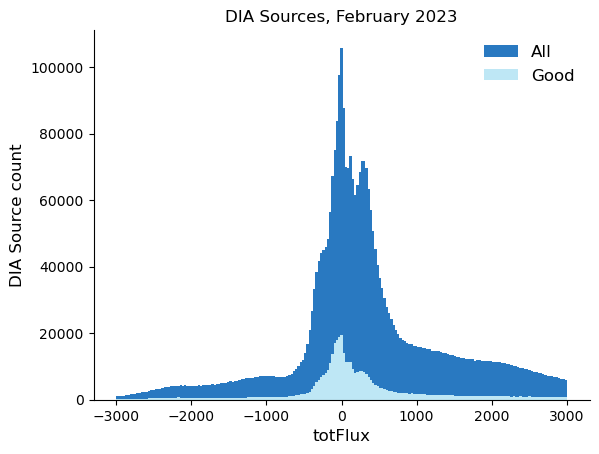

In [25]:
plac.plotFluxHistSrc(srcTable, goodSrc, fluxType='totFlux', label1='All', label2='Good',
                title=f'DIA Sources, {month} {year}')
plac.plotFluxHistSrc(srcTable_old, goodSrc_old, fluxType='totFlux', label1='All', label2='Good',
                title=f'DIA Sources, {month_old} {year_old}')

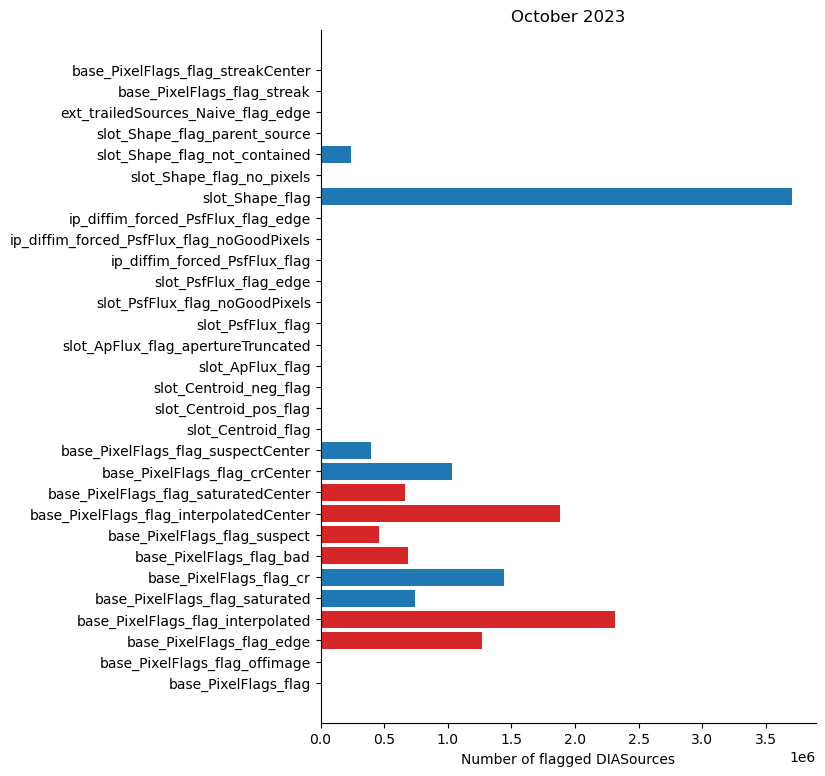

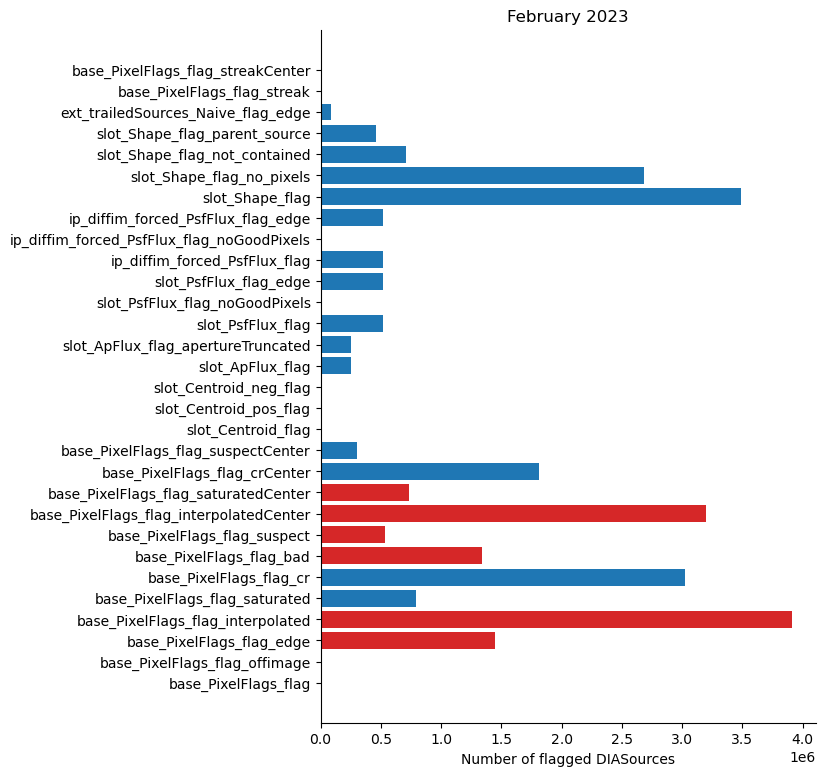

In [26]:
plac.plotFlagHist(srcTable, title=f'{month} {year}', badFlagList=badFlagList)
plac.plotFlagHist(srcTable_old, title=f'{month_old} {year_old}', badFlagList=badFlagList)

### By the numbers

In [27]:
nGoodObj = len(goodObj)
nGoodObj_old = len(goodObj_old)

print(f"{month} {year}, Number of good objects: ",nGoodObj)
print(f"{month_old} {year_old}, Number of good objects: ",nGoodObj_old)

print("Diff: ", nGoodObj-nGoodObj_old)

October 2023, Number of good objects:  2145507
February 2023, Number of good objects:  363523
Diff:  1781984


In [28]:
nObj = len(objTable)
nObj_old = len(objTable_old)

print(f"{month} {year}, Number of objects: ",nObj)
print(f"{month_old} {year_old}, Number of objects: ",nObj_old)

print("Diff: ", nObj-nObj_old)

October 2023, Number of objects:  3352118
February 2023, Number of objects:  2451020
Diff:  901098


In [29]:
nGoodSrc = len(goodSrc)
nGoodSrc_old = len(goodSrc_old)

print(f"{month} {year}, Number of good sources: ",nGoodSrc)
print(f"{month_old} {year_old}, Number of good sources: ",nGoodSrc_old)

print("Diff: ", nGoodSrc-nGoodSrc_old)

October 2023, Number of good sources:  3295613
February 2023, Number of good sources:  814855
Diff:  2480758


In [30]:
nSrc = len(srcTable)
nSrc_old = len(srcTable_old)

print(f"{month} {year}, Number of sources: ",nSrc)
print(f"{month_old} {year_old}, Number of sources: ",nSrc_old)

print("Diff: ", nSrc-nSrc_old)

October 2023, Number of sources:  6395278
February 2023, Number of sources:  5002525
Diff:  1392753


In [31]:
flagSum = flagTable.sum()
flagSum_old = flagTable_old.sum()

print(f"Difference between {month} {year} run and {month_old} {year_old} run, ordered:")
flagSum.subtract(flagSum_old).sort_values()

Difference between October 2023 run and February 2023 run, ordered:


slot_Shape_flag_no_pixels                    -2683043
base_PixelFlags_flag_interpolated            -1599967
base_PixelFlags_flag_cr                      -1583691
base_PixelFlags_flag_interpolatedCenter      -1312904
base_PixelFlags_flag_crCenter                 -775315
base_PixelFlags_flag_bad                      -652861
slot_PsfFlux_flag                             -507555
ip_diffim_forced_PsfFlux_flag                 -506981
ip_diffim_forced_PsfFlux_flag_edge            -506903
slot_PsfFlux_flag_edge                        -506903
slot_Shape_flag_not_contained                 -471021
slot_Shape_flag_parent_source                 -457341
slot_ApFlux_flag_apertureTruncated            -250392
slot_ApFlux_flag                              -247445
base_PixelFlags_flag_edge                     -177955
ext_trailedSources_Naive_flag_edge             -90264
base_PixelFlags_flag_suspect                   -80970
base_PixelFlags_flag_saturatedCenter           -74318
base_PixelFlags_flag_saturat

In [32]:
tractList = [9813]

In [33]:
allInjectedFakes = butler.get('fakes_fakeSourceCat', collections=collections,
                 instrument=instrument, skymap=skymap, tract=9813, storageClass='ArrowAstropy')
allInjectedFakes['ra'] = (allInjectedFakes['ra']*u.radian).to(u.deg)
allInjectedFakes['dec']= (allInjectedFakes['dec']*u.radian).to(u.deg)

In [34]:
diaSource = butler.get('fakes_goodSeeingDiff_diaSrcTable', collections=collections,
                 instrument=instrument, detector=62, visit=352, skymap=skymap, tract=9813, storageClass='ArrowAstropy')

In [35]:
from astropy.table import Table
from lsst.analysis.tools.tasks.catalogMatch import CatalogMatchTask

t1 = Table()
t1["ra_steven"] = [1,2]
t1["dec_manuel"] = [1,2]

t2 = Table()
t2["ra"] = [1,2]
t2["dec"] = [1,2]

CMT = CatalogMatchTask()
CMT.config.selectorBands = []
CMT.config.targetRaColumn = "ra"
CMT.config.targetDecColumn = "dec"
CMT.config.refRaColumn = "ra"
CMT.config.refDecColumn = "dec"                                      

matchedCat = CMT.run(targetCatalog=allInjectedFakes, refCatalog=diaSource, bands=[])
print(matchedCat)

Struct(matchedCatalog=   fakeId_target         dec_target     ...   matchDistance   
                            deg         ...                   
-------------------- ------------------ ... ------------------
12633253782695864572 2.4078610751899943 ... 0.6771659805547349)


Well that's not good.